# Pratical Machine Learning 
## Fátima Vilela Candal

# Data processing
The original training and test data has 160 variables. The columns with NA entries have been removed. Five (5) variables were removed.

In [498]:
# Importing Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import math

from sklearn.model_selection import train_test_split 

from sklearn.neighbors import KNeighborsClassifier  

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [499]:
# Importing the Dataset 
df = pd.read_csv('pml-training.csv')

In [500]:
# Clear all null data
df.dropna(inplace=True)

In [501]:
# Total rows and columns 
print("Train data line and colum: {}".format(df.shape))

Train data line and colum: (406, 160)


In [502]:
# Columns present in the dataset 
print(df.columns) 

Index(['Unnamed: 0', 'user_name', 'raw_timestamp_part_1',
       'raw_timestamp_part_2', 'cvtd_timestamp', 'new_window', 'num_window',
       'roll_belt', 'pitch_belt', 'yaw_belt',
       ...
       'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z',
       'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z',
       'magnet_forearm_x', 'magnet_forearm_y', 'magnet_forearm_z', 'classe'],
      dtype='object', length=160)


In [503]:
# Data types
df.dtypes

Unnamed: 0                   int64
user_name                   object
raw_timestamp_part_1         int64
raw_timestamp_part_2         int64
cvtd_timestamp              object
new_window                  object
num_window                   int64
roll_belt                  float64
pitch_belt                 float64
yaw_belt                   float64
total_accel_belt             int64
kurtosis_roll_belt          object
kurtosis_picth_belt         object
kurtosis_yaw_belt           object
skewness_roll_belt          object
skewness_roll_belt.1        object
skewness_yaw_belt           object
max_roll_belt              float64
max_picth_belt             float64
max_yaw_belt                object
min_roll_belt              float64
min_pitch_belt             float64
min_yaw_belt                object
amplitude_roll_belt        float64
amplitude_pitch_belt       float64
amplitude_yaw_belt          object
var_total_accel_belt       float64
avg_roll_belt              float64
stddev_roll_belt    

In [504]:
# Presentation of null data 
df.isnull().sum()

Unnamed: 0                 0
user_name                  0
raw_timestamp_part_1       0
raw_timestamp_part_2       0
cvtd_timestamp             0
new_window                 0
num_window                 0
roll_belt                  0
pitch_belt                 0
yaw_belt                   0
total_accel_belt           0
kurtosis_roll_belt         0
kurtosis_picth_belt        0
kurtosis_yaw_belt          0
skewness_roll_belt         0
skewness_roll_belt.1       0
skewness_yaw_belt          0
max_roll_belt              0
max_picth_belt             0
max_yaw_belt               0
min_roll_belt              0
min_pitch_belt             0
min_yaw_belt               0
amplitude_roll_belt        0
amplitude_pitch_belt       0
amplitude_yaw_belt         0
var_total_accel_belt       0
avg_roll_belt              0
stddev_roll_belt           0
var_roll_belt              0
                          ..
max_roll_forearm           0
max_picth_forearm          0
max_yaw_forearm            0
min_roll_forea

In [528]:
# Data presented 20 columns and 05 rows
df.head(5)

,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
23,24,carlitos,1323084232,996313,05/12/2011 11:23,yes,12,1.51,8.10,-94.40,...,0.03,-0.03,0.00,193,203,-213,-11,661.0,470.0,A
51,52,carlitos,1323084233,948290,05/12/2011 11:23,yes,13,1.27,7.56,-94.10,...,0.02,0.00,-0.05,190,207,-216,-10,653.0,467.0,A
75,76,carlitos,1323084234,984276,05/12/2011 11:23,yes,14,1.18,7.26,-94.10,...,0.06,0.00,0.03,192,205,-213,-5,653.0,475.0,A
164,165,carlitos,1323084238,972281,05/12/2011 11:23,yes,18,1.01,7.38,-93.80,...,0.02,0.00,-0.02,195,205,-213,-10,653.0,475.0,A
209,210,pedro,1323094970,968279,05/12/2011 14:22,yes,47,129.00,27.90,2.35,...,0.18,0.03,-0.03,158,228,-184,-153,753.0,673.0,A


In [506]:
# Descriptive statistics for each column
df.describe()

,Unnamed: 0,raw_timestamp_part_1,raw_timestamp_part_2,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,max_roll_belt,max_picth_belt,...,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,406.000000,4.060000e+02,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,...,406.000000,406.000000,406.00000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,10091.330049,1.322828e+09,971714.034483,446.524631,68.164409,0.475123,-8.515911,11.812808,-6.667241,12.923645,...,4639.849068,0.139015,0.07734,0.115739,-76.591133,152.142857,-58.719212,-327.344828,355.830049,402.960591
std,5721.085942,1.965068e+05,47632.942142,249.431290,62.918868,22.444911,94.044798,7.701815,94.594252,8.005960,...,7284.972361,0.658534,2.18122,0.710057,179.796319,201.498079,132.719848,341.141163,498.486101,350.169283
min,24.000000,1.322490e+09,492326.000000,2.000000,-27.800000,-51.600000,-175.000000,1.000000,-94.300000,3.000000,...,0.000000,-3.080000,-5.49000,-7.940000,-464.000000,-406.000000,-329.000000,-1270.000000,-835.000000,-955.000000
25%,5283.500000,1.322673e+09,968313.250000,228.500000,1.150000,1.412500,-88.200000,4.000000,-88.000000,5.000000,...,0.274550,-0.240000,-1.40750,-0.175000,-187.500000,39.500000,-181.000000,-617.500000,-59.750000,240.500000
50%,10303.000000,1.322833e+09,982650.500000,464.500000,116.000000,5.385000,-6.705000,17.000000,-5.100000,18.000000,...,612.214225,0.030000,0.05000,0.075000,-64.000000,162.000000,-37.500000,-416.500000,573.000000,512.000000
75%,15055.500000,1.323084e+09,992286.250000,665.500000,123.000000,15.525000,14.500000,18.000000,18.500000,19.000000,...,7368.414252,0.660000,1.55000,0.480000,50.750000,304.750000,20.000000,-97.250000,724.750000,657.750000
max,19622.000000,1.323095e+09,998801.000000,864.000000,161.000000,60.000000,177.000000,27.000000,180.000000,30.000000,...,39009.333330,1.560000,5.64000,2.230000,276.000000,583.000000,254.000000,655.000000,1450.000000,953.000000


# Train Test Split
We will divide our dataset into training and test splits, which gives us a better idea as to how our algorithm performed during the testing phase. This way our algorithm is tested on un-seen data, as it would be in a production application.

In [551]:
# Preprocessing
# The next step is to split our dataset into its attributes and labels

cols = ['raw_timestamp_part_1',
'raw_timestamp_part_2',
'num_window',
'roll_belt',
'pitch_belt',
'yaw_belt',
'gyros_forearm_x',
'gyros_forearm_y',
'gyros_forearm_z',
'accel_forearm_x',
'accel_forearm_y',
'accel_forearm_z',
'magnet_forearm_x',
'magnet_forearm_y',
'magnet_forearm_z']


X = df[cols]
y = df.classe

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)  

In [542]:
print (X_train.shape)

(304, 15)


In [543]:
print (X_test.shape)

(102, 15)


#  Model
The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. In the second line, this class is initialized with one parameter, i.e. n_neigbours. This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, however to start out, 5 seems to be the most commonly used value for KNN algorithm.

After all the work of data preparation, creating and training the model KNN regression model from skicit-learn, instantiate the model, and fit  the model on the training data. 

# Predictions
It is extremely straight forward to train the KNN algorithm and make predictions with it, especially when using Scikit-Learn.

In [544]:
# from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=20)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [545]:
# Prediction
y_pred = classifier.predict(X_test) 
y_pred 

array(['A', 'C', 'A', 'A', 'C', 'B', 'E', 'D', 'D', 'A', 'B', 'B', 'C',
       'A', 'A', 'A', 'A', 'D', 'C', 'A', 'C', 'A', 'A', 'C', 'C', 'D',
       'B', 'A', 'A', 'B', 'A', 'A', 'A', 'E', 'B', 'B', 'A', 'A', 'B',
       'A', 'A', 'A', 'A', 'C', 'A', 'A', 'A', 'B', 'D', 'C', 'C', 'A',
       'A', 'A', 'A', 'C', 'A', 'B', 'A', 'A', 'D', 'A', 'A', 'A', 'D',
       'A', 'C', 'B', 'A', 'A', 'B', 'A', 'C', 'B', 'C', 'C', 'B', 'D',
       'D', 'A', 'C', 'D', 'B', 'B', 'A', 'C', 'A', 'A', 'B', 'A', 'A',
       'D', 'A', 'B', 'B', 'A', 'B', 'A', 'C', 'A', 'A', 'B'],
      dtype=object)

# Evaluating the Algorithm
For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 

In [547]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[17  4  4  1  0]
 [ 9  3  4  4  0]
 [ 5  2  2  2  0]
 [ 6  7  2  2  0]
 [13  5  6  2  2]]
              precision    recall  f1-score   support

           A       0.34      0.65      0.45        26
           B       0.14      0.15      0.15        20
           C       0.11      0.18      0.14        11
           D       0.18      0.12      0.14        17
           E       1.00      0.07      0.13        28

   micro avg       0.25      0.25      0.25       102
   macro avg       0.36      0.23      0.20       102
weighted avg       0.43      0.25      0.22       102



# Comparing Error Rate with the K Value
In the training and prediction section we said that there is no way to know beforehand which value of K that yields the best results in the first go. 

We randomly chose 5 as the K value and it just happen to result in 100% accuracy.

One way find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset.

We will plot the mean error for the predicted values of test set for all the K values between 1 and 40.

In [548]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

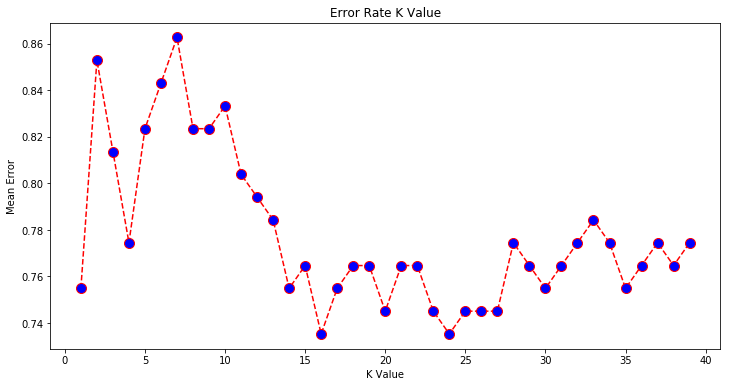

In [549]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Conclusion
KNN is a simple yet powerful classification algorithm. It requires no training for making predictions, which is typically one of the most difficult parts of a machine learning algorithm. The KNN algorithm have been widely used to find document similarity and pattern recognition. It has also been employed for developing recommender systems and for dimensionality reduction and pre-processing steps for computer vision, particularly face recognition tasks.

